In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
hoop_diam = 0.4572  # m
half_court_to_baseline = 14.3256 # m
baseline_to_backboard = 1.2192 # m

In [3]:
x_velocity = 7.6 #3.5 # m/s
x_dist = half_court_to_baseline - baseline_to_backboard# - 0.5 * hoop_diam
print(x_dist)

13.106399999999999


In [4]:
t = x_dist/x_velocity
print(t)

1.7245263157894737


In [5]:
y_init_height = 1.95 #m
y_fin_height = 3.048 # m
y_accel = -9.81 # m/s2
y_dist = y_fin_height - y_init_height # m
y_velocity = (y_dist-(0.5*y_accel*(t**2)))/t
print(y_velocity)

9.095498154666101


In [9]:
(y_velocity**2)/(2*9.81) + 1.95  # max height

6.166518179486975

In [6]:
time = np.linspace(0,t)
velocity = y_velocity + time*y_accel
df = pd.DataFrame({'time':time,'velocity':velocity})
df['time_delta'] = abs(df['time'].shift(1) - df['time'])
df['time_delta'].iloc[0] = 0
distance_delta = df['time_delta'] * df['velocity']
distance_delta[0] = y_init_height
distance = np.cumsum(distance_delta)
df['distance'] = distance
df

,time,velocity,time_delta,distance
0,0.000000,9.095498,0.000000,1.950000
1,0.035194,8.750241,0.035194,2.257960
2,0.070389,8.404984,0.035194,2.553768
3,0.105583,8.059727,0.035194,2.837425
4,0.140778,7.714469,0.035194,3.108932
5,0.175972,7.369212,0.035194,3.368287
6,0.211166,7.023955,0.035194,3.615491
7,0.246361,6.678698,0.035194,3.850544
8,0.281555,6.333440,0.035194,4.073445
9,0.316750,5.988183,0.035194,4.284196


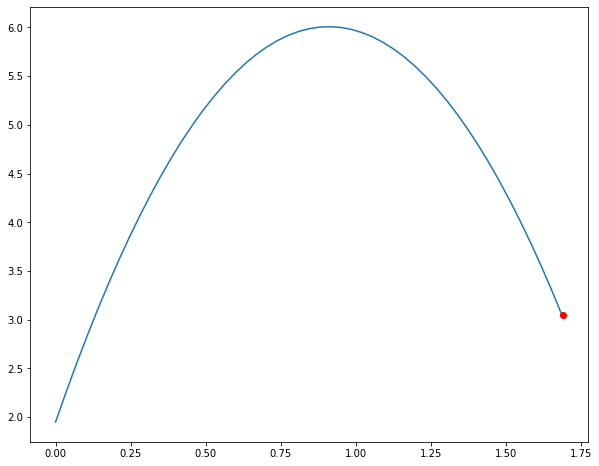

In [7]:
plt.figure(figsize=[10,8])
plt.plot(df['time'].values[:-1],df['distance'].values[:-1])
plt.plot(df['time'].values[48],3.048,'ro')
plt.show()